# Categorical Support Vector Classifier

## Imports

In [5]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

## Loading the database

#### Read the csv file and study the database

In [20]:
df = pd.read_csv("./social.csv", dtype = str)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.00,19000.00,0
1,15810944,Male,35.00,20000.00,0
2,15668575,Female,26.00,43000.00,0
3,15603246,Female,27.00,57000.00,0
4,15804002,Male,19.00,76000.00,0


In [72]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [41]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000.00     12
80000.00     11
79000.00     10
75000.00      9
71000.00      9
             ..
123000.00     1
37000.00      1
115000.00     1
148000.00     1
139000.00     1
Name: count, Length: 117, dtype: int64

In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Preprocessing

#### Define the target and the inputs

In [97]:
target = df['Purchased']
inputs = df.drop(['Purchased'],axis=1)
inputs = inputs.drop(['User ID',"Gender"],axis=1)
inputs["Age"]=inputs["Age"].astype("float")

In [99]:
inputs

,Age,EstimatedSalary
0,19.0,19000.00
1,35.0,20000.00
2,26.0,43000.00
3,27.0,57000.00
4,19.0,76000.00
...,...,...
395,46.0,41000.00
396,51.0,23000.00
397,50.0,20000.00
398,36.0,33000.00


#### Create a training and a testing dataset

In [125]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, train_size=0.7, random_state=365, stratify = target)

#### Check the result from the stratification

In [158]:
y_train.value_counts(normalize = True)

Purchased
0    0.642857
1    0.357143
Name: proportion, dtype: float64

#### Define a separate encoder for the target and the inputs 

In [130]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [134]:
x_train

,Age,EstimatedSalary
55,24.0,55000.00
132,30.0,87000.00
308,36.0,125000.00
4,19.0,76000.00
311,39.0,96000.00
...,...,...
57,28.0,79000.00
332,42.0,65000.00
155,31.0,15000.00
378,41.0,87000.00


In [135]:
x_train

,Age,EstimatedSalary
55,24.0,55000.00
132,30.0,87000.00
308,36.0,125000.00
4,19.0,76000.00
311,39.0,96000.00
...,...,...
57,28.0,79000.00
332,42.0,65000.00
155,31.0,15000.00
378,41.0,87000.00


## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [139]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_rescaled = scaling.transform(x_train)
x_test_rescaled = scaling.transform(x_test)

## Classification

In [141]:
C=1.0
svc = svm.SVC(kernel="linear",C=C).fit(x_train_rescaled,y_train)

## Evaluation

#### Evaluate the model on the test data

In [149]:
y_pred=svc.predict(x_test_rescaled)

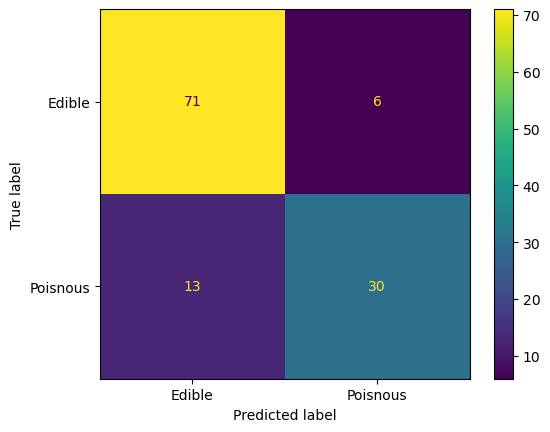

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred , display_labels=["Edible","Poisnous"] )

In [152]:
print(classification_report(y_test ,y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        77
           1       0.83      0.70      0.76        43

    accuracy                           0.84       120
   macro avg       0.84      0.81      0.82       120
weighted avg       0.84      0.84      0.84       120



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data